In [1]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

### Dataexploration

In [2]:
songs = pd.read_csv("../songtexte_bereinigt_gekuerzt.csv")
songs

,Unnamed: 0,artist,song,text,number_of_tokens
0,0,ABBA,Ahe's My Kind Of Girl,look at her face it's a wonderful face and i...,741
1,1,ABBA,"Andante, Andante",take it easy with me please touch me gently ...,1381
2,2,ABBA,As Good As New,i'll never know why i had to go why i had to ...,1438
3,3,ABBA,Bang,making somebody happy is a question of give an...,1207
4,4,ABBA,Bang-A-Boomerang,making somebody happy is a question of give an...,1223
...,...,...,...,...,...
50827,57642,Ziggy Marley,Friend,i wanna thank you for the things you've done...,691
50828,57643,Ziggy Marley,G7,seven richest countries in the world them hav...,1443
50829,57644,Ziggy Marley,Generation,many generation have passed away fighting for...,1391
50830,57645,Ziggy Marley,Good Old Days,irie days come on play let the angels fly let...,858


#### explore data

In [4]:
c = Counter(songs.artist)
c.most_common(1)

[('Donna Summer', 191)]

In [5]:
artists = np.unique(songs.artist)
print(len(np.unique(songs.artist)))
len(songs)

415


50832

In [6]:
mean ={}
for a in artists:
    mean[a] = int(np.mean(songs.number_of_tokens[songs.artist==a]))

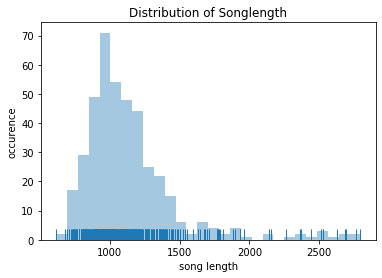

In [13]:
ax = sns.distplot(list(mean.values()), rug=True, kde=False)
ax.set_xlabel("song length")
ax.set_ylabel("occurence")
ax.set_title("Distribution of Songlength")
plt.savefig("songlength_dist")
plt.show()

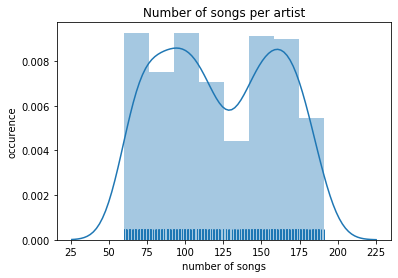

In [14]:
ax = sns.distplot(list(c.values()), rug=True)
ax.set_xlabel("number of songs")
ax.set_ylabel("occurence")
ax.set_title("Number of songs per artist")
plt.savefig("songnumber_per_artist")
plt.show()

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2000, min_df=10, max_df=300, stop_words='english')
cv.fit(songs['text'])

results = cv.transform(songs['text'])

features = cv.get_feature_names()

In [64]:
df_res = pd.DataFrame(results.toarray(), columns=features)
df_res = df_res.set_index(songs.artist)

In [65]:
df_res.loc['sum']=df_res.sum()
df_res = df_res.div(df_res.sum(axis=1), axis=0)

In [66]:
df_res.sort_values(by=['sum'], axis=1, inplace=True, ascending=False)

In [68]:
df_res.to_csv('word_frequencies.csv')

In [3]:
df_res = pd.read_csv("word_frequencies.csv")

In [4]:
df_res = df_res.set_index(df_res.artist)

In [5]:
df_res = df_res.drop("artist", axis=1)
df_res

,na,doo,gimme,ba,oo,bang,pum,boom,hallelujah,america,...,attraction,nearer,nightmares,baba,obsession,000,joker,chrome,auld,define
artist,,,,,,,,,,,,,,,,,,,,,
ABBA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
ABBA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
ABBA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
ABBA,0.000000,0.000000,0.000000,0.000000,0.000000,0.173913,0.000000,0.217391,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
ABBA,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.357143,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ziggy Marley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
Ziggy Marley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
Ziggy Marley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000


In [6]:
abba = df_res[df_res.index=="ABBA"]
abba.loc['sum']=abba.sum()
abba = abba.div(abba.sum(axis=1), axis=0)
abba.sort_values(by=['sum'], axis=1, inplace=True, ascending=False)
abba

/home/teresa/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,fellow,familiar,autumn,helping,rocking,hug,harmony,tricks,roller,chills,...,shown,switch,wreck,colder,presence,president,county,ecstasy,press,define
artist,,,,,,,,,,,,,,,,,,,,,
ABBA,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABBA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABBA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABBA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABBA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ABBA,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABBA,0.000000,0.000000,0.000000,0.000000,0.000000,0.382353,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABBA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


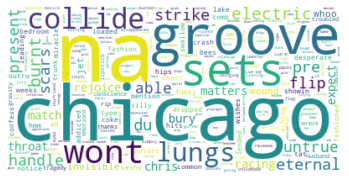

In [54]:
from wordcloud import WordCloud

def makeImage(text, figname):
    wc = WordCloud(background_color="white", max_words=1000)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(figname)
    plt.show()

text = abba.loc['sum']
# text = abba.any()
makeImage(text, "wordcloud_falloutboy")

In [36]:
# np.unique(songs.artist)

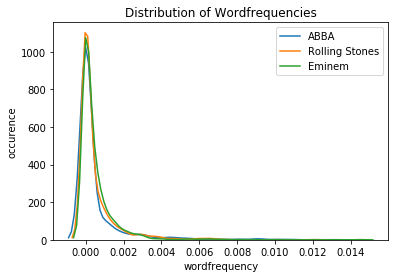

In [26]:
ax = sns.distplot(abba.loc['sum'], hist=False, label="ABBA")
ax = sns.distplot(stones.loc['sum'], hist=False, label="Rolling Stones")
ax = sns.distplot(eminem.loc['sum'], hist=False, label="Eminem")
ax.set_xlabel("wordfrequency")
ax.set_ylabel("occurence")
plt.title("Distribution of Wordfrequencies")
plt.savefig("distribution_wordfrequencies")
plt.legend()

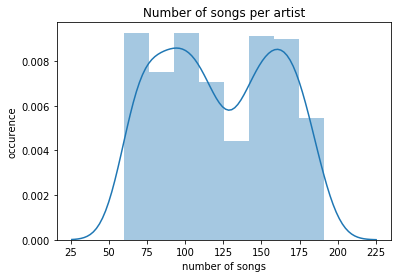

In [27]:
c = Counter(songs.artist)
ax = sns.distplot(list(c.values()))
ax.set_xlabel("number of songs")
ax.set_ylabel("occurence")
plt.title("Number of songs per artist")
plt.savefig("songs_per_artist")

In [46]:
mfw = df_res.copy()
mfw = mfw.iloc[:,:30]
mfw.dropna()

,na,doo,gimme,ba,oo,bang,pum,boom,hallelujah,america,...,hoo,pa,hollywood,goodnight,mmm,bop,freak,cuz,miracle,workin
artist,,,,,,,,,,,,,,,,,,,,,
ABBA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
ABBA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
ABBA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
ABBA,0.000000,0.000000,0.000000,0.000000,0.000000,0.173913,0.000000,0.217391,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
ABBA,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.357143,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ziggy Marley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
Ziggy Marley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
Ziggy Marley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000


In [94]:
abba = mfw[mfw.index=="ABBA"]
abba.loc['sum']=abba.sum()
abba = abba.div(abba.sum(axis=1), axis=0)
# abba.sort_values(by=['sum'], axis=1, inplace=True, ascending=False)

In [93]:
stones = mfw[mfw.index=="Rolling Stones"]
stones.loc['sum']=stones.sum()
stones = stones.div(stones.sum(axis=1), axis=0)
# stones.sort_values(by=['sum'], axis=1, inplace=True, ascending=False)

In [92]:
eminem = mfw[mfw.index=="Eminem"]
eminem.loc['sum']=eminem.sum()
eminem = eminem.div(eminem.sum(axis=1), axis=0)
# eminem.sort_values(by=['sum'], axis=1, inplace=True, ascending=False)

/home/teresa/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


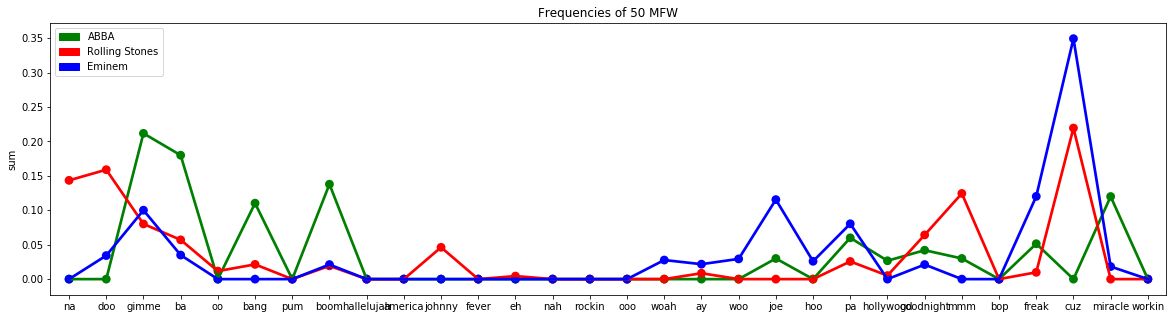

In [98]:
import matplotlib.patches as mpatches
green = mpatches.Patch(color='g', label='ABBA')
red = mpatches.Patch(color='r', label='Rolling Stones')
blue = mpatches.Patch(color='b', label='Eminem')


fig, ax = plt.subplots(figsize=(20,5))
ax = sns.pointplot(x=abba.columns, y=abba.loc['sum'],color='g')
ax = sns.pointplot(x=stones.columns, y=stones.loc['sum'], color='r')
ax = sns.pointplot(x=eminem.columns, y=eminem.loc['sum'], color='b')
plt.title("Frequencies of 50 MFW")
plt.legend(handles=[green, red, blue])
plt.savefig("freq_50mfw")

#### sample data

In [15]:
songs_sample = songs.copy()
songs_sample = songs_sample.sample(frac=.25, replace=False, random_state=42)
songs_sample

,artist,song,text,number_of_tokens
20468,Van Halen,Take Your Whiskey Home,"[well, my, baby, she, don't, want, me, around....",224
41605,Lil Wayne,Army Gunz,"[yeah, yeah, yeah, (i, got, army, gunz), yeah,...",578
52292,Stevie Wonder,Isn't She Lovely,"[isn't, she, lovely, isn't, she, wonderful, is...",108
42697,Mariah Carey,O Holy Night,"[o, holy, night, the, stars, are, brightly, sh...",78
27993,Clash,I'm So Bored With The U.S.A.,"[yankee, soldier, he, want, to, shoot, some, s...",113
...,...,...,...,...
25325,Billie Holiday,My Last Affair,"[can't, you, see, what, love, and, romance, ha...",97
28783,Dave Matthews Band,The Space Between,"[you, cannot, quit, me, so, quickly, is, no, h...",310
18645,Squeeze,Crying In My Sleep,"[breaking, up, is, breaking, my, heart, is, sh...",178
32684,Foo Fighters,Dear Lover,"[dear, lover, do, you, remember?, the, sound, ...",134


In [16]:
songs_sample.to_csv("sample_25percent.csv")